Instructions:


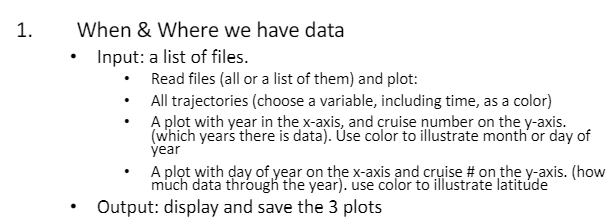

In [57]:
#import necessary packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings 
warnings.simplefilter('ignore') 

currentYear = 2022

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from calendar import month_abbr

In [2]:
ddir = '~/Repositories/2022_SummerInternship_FarallonInstitute/saildrone_data/'  #data 2
fn_list = ['saildrone_west_coast_survey_2018_sd1026_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_west_coast_survey_2019_sd1047_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_west_coast_survey_2019_sd1043_JPLv5.0_8dy_20210613norep_20210613_20211116.nc']

In [25]:
# classxarray.Dataset(data_vars=None, coords=None, attrs=None)

sail = xr.open_dataset(ddir+fn_list[0])
sail["relativeID"] = 0
yearList = [sail["time"][0].dt.year]
realID = [int(sail.attrs["id"])]
durationList = [sail["time"][len(sail["time"])-1] - sail["time"][0]]
sail["duration"] = durationList[0]
if(len(fn_list)>1):
    for i in range(1, len(fn_list)):
        temp = xr.open_dataset(ddir+fn_list[i])
        temp["relativeID"] = i
        yearList.append(temp["time"][0].dt.year)
        realID.append(int(temp.attrs["id"]))
        tempDuration = temp["time"][len(temp["time"])-1] - temp["time"][0]
        temp["duration"] = tempDuration
        durationList.append(tempDuration)
        sail = xr.concat([sail, temp], dim="time")
        temp.close()
sail



AttributeError: 'list' object has no attribute 'dt'

['lat', 'lon', 'SOG_MEAN', 'COG_MEAN', 'HDG_MEAN', 'PITCH_MEAN', 'BARO_PRES_MEAN', 'TEMP_AIR_MEAN', 'RH_MEAN', 'PAR_AIR_MEAN', 'UWND_MEAN', 'VWND_MEAN', 'WWND_MEAN', 'GUST_WND_MEAN', 'TEMP_CTD_MEAN', 'TEMP_CTD_STDDEV', 'SAL_CTD_MEAN', 'CHLOR_MEAN', 'ROLL_MEAN', 'TEMP_RBR_MEAN', 'SAL_RBR_MEAN', 'TEMP_O2_RBR_MEAN', 'CDOM_MEAN', 'CHLOR_WETLABS_MEAN', 'WIND_MEASUREMENT_HEIGHT_MEAN', 'sat_smap_sss', 'sat_anc_sss', 'sat_anc_sst', 'sat_smap_spd', 'sat_smap_high_spd', 'sat_weight', 'sat_land_fraction', 'sat_ice_fraction', 'sat_smap_sss_uncertainty', 'sat_lat', 'sat_lon', 'dist_land', 'analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction', 'relativeID', 'duration']


what variable should be plotted: SAL_CTD_MEAN


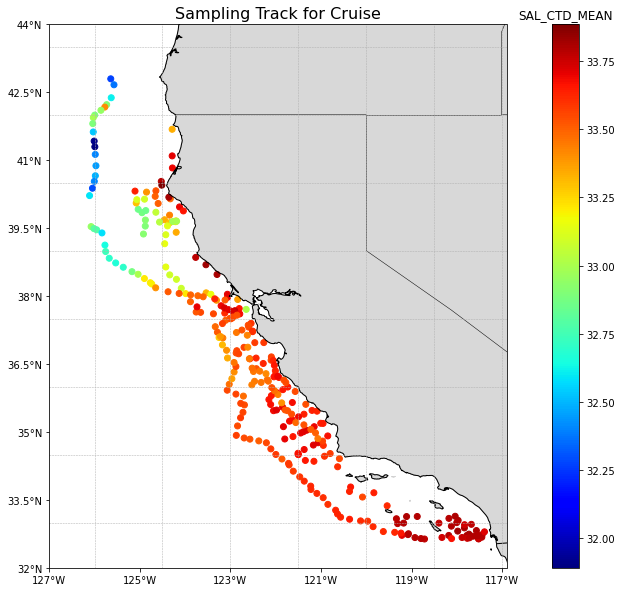

In [4]:


sail['date'] = mdates.date2num(sail['time'].dt.date)


print([i for i in sail.data_vars])
var_to_plot=input('what variable should be plotted:')


# default_x_ticks = range(0,max(sail[var_to_plot]),divmod(max(sail[var_to_plot]), 10)[0]) #selects out 10 evenly spaced dates from the data
#define latitude and longitude boundaries
latr = [min(sail['lat']), max(sail['lat'])] 
lonr = [max(sail['lon']), min(sail['lon'])] 

# Select a region of our data, giving it a margin
margin = 0.5 
region = np.array([[latr[0]-margin,latr[1]+margin],[lonr[0]+margin,lonr[1]-margin]]) 

#add state outlines
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Create and set the figure context
fig = plt.figure(figsize=(16,10), dpi = 72) 
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines(resolution='10m',linewidth=1,color='black') 
ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
ax.add_feature(states_provinces, linewidth = 0.5)
ax.add_feature(cfeature.BORDERS)
ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
ax.set_xticks(np.round([*np.arange(region[1,1],region[1,0]+1,2)][::-1],0), crs=ccrs.PlateCarree()) 
ax.set_yticks(np.round([*np.arange(np.floor(region[0,0]),region[0,1]+1,1.5)],1), crs=ccrs.PlateCarree()) 
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(linestyle = '--', linewidth = 0.5)

# Plot track data, color by temperature
loc = mdates.AutoDateLocator()
sc = plt.scatter(x = sail['lon'], y = sail['lat'], c = sail[var_to_plot], cmap='jet')
#plt.plot(sail['lon'], sail['lat'], ls = ':', c = 'navy', alpha = 0.4)
clb = fig.colorbar(sc, ticks=loc)
clb.ax.set_title(var_to_plot)
# clb.set_ticks(sail[var_to_plot][default_x_ticks])
plt.title('Sampling Track for Cruise', fontdict = {'fontsize' : 16})
plt.show()

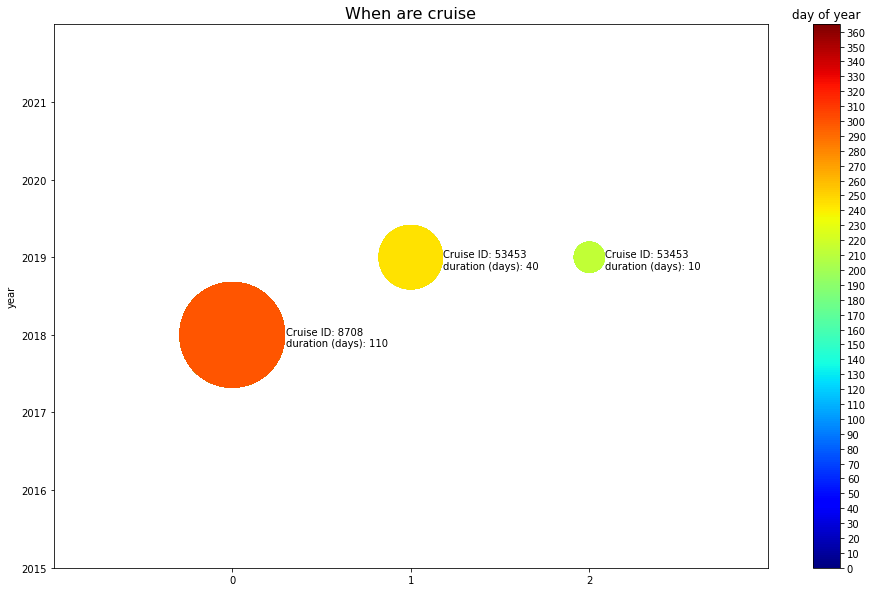

In [56]:
fig = plt.figure(figsize=(16,10), dpi = 72) 
ax = plt.axes()
pl_obj = plt.scatter(x =sail["relativeID"] , y =sail['time'].dt.year, s=(sail['duration'].dt.days)*100, c = sail['time'].dt.dayofyear, cmap='jet', vmin = 0, vmax = 365) # 
clb = fig.colorbar(pl_obj, ticks=range(0,365,10))
clb.ax.set_title("day of year")
ax.set(xlim=(-1, max(sail["relativeID"])+1), xticks=np.arange(-1, max(sail["relativeID"]))+1,
    ylim=(2015, currentYear), yticks=np.arange(2015, currentYear))
ax.set_ylabel("year")



for i in range(len(realID)):
    
    duration = float(durationList[i])/86400000000000
    
    xOffset = np.sqrt(duration)/35
    
    plt.annotate(("Cruise ID: " + str(realID[i]))
                 , (i+xOffset, yearList[i]))
    plt.annotate(("duration (days): " + str(round(duration)))
                 , (i+xOffset, yearList[i]-0.15))


plt.title('When are cruise', fontdict = {'fontsize' : 16})
plt.show()